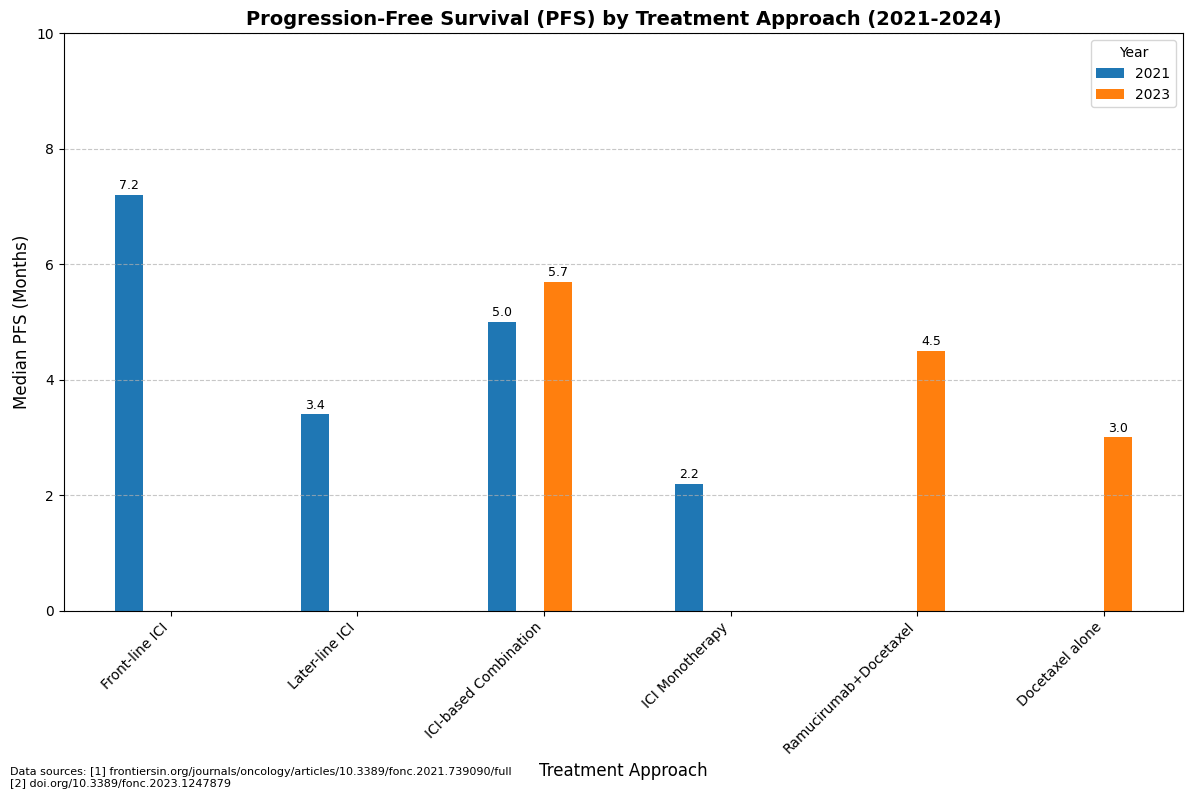

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data from report (2020-2025)
years = [2021, 2022, 2023, 2024]
treatments = [
    "Front-line ICI",
    "Later-line ICI",
    "ICI-based Combination",
    "ICI Monotherapy",
    "Ramucirumab+Docetaxel",
    "Docetaxel alone"
]

# Progression-Free Survival (months) data
pfs_data = [
    [7.2, None, None, None],  # Front-line ICI (2021)
    [3.4, None, None, None],  # Later-line ICI (2021)
    [5.0, None, 5.7, None],   # ICI-based Combination (2021, 2023)
    [2.2, None, None, None],  # ICI Monotherapy (2021)
    [None, None, 4.5, None],  # Ramucirumab+Docetaxel (2023)
    [None, None, 3.0, None]   # Docetaxel alone (2023)
]

# Create plot
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.15
x = np.arange(len(treatments))

# Plot bars for each year
for i, year in enumerate(years):
    # Extract data for this year
    values = [row[i] if row[i] is not None else 0 for row in pfs_data]
    # Only plot if there's data
    if any(values):
        bars = ax.bar(x + i*bar_width, values, bar_width, label=str(year))
        # Add value labels
        for bar, value in zip(bars, values):
            if value > 0:
                ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                       f'{value}', ha='center', fontsize=9)

# Customize plot
ax.set_title('Progression-Free Survival (PFS) by Treatment Approach (2021-2024)',
            fontsize=14, fontweight='bold')
ax.set_xlabel('Treatment Approach', fontsize=12)
ax.set_ylabel('Median PFS (Months)', fontsize=12)
ax.set_xticks(x + bar_width * (len(years) - 1) / 2)
ax.set_xticklabels(treatments, rotation=45, ha='right')
ax.legend(title='Year')
ax.set_ylim(0, 10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.figtext(0.01, 0.01,
           "Data sources: [1] frontiersin.org/journals/oncology/articles/10.3389/fonc.2021.739090/full\n"
           "[2] doi.org/10.3389/fonc.2023.1247879", fontsize=8)
plt.show()

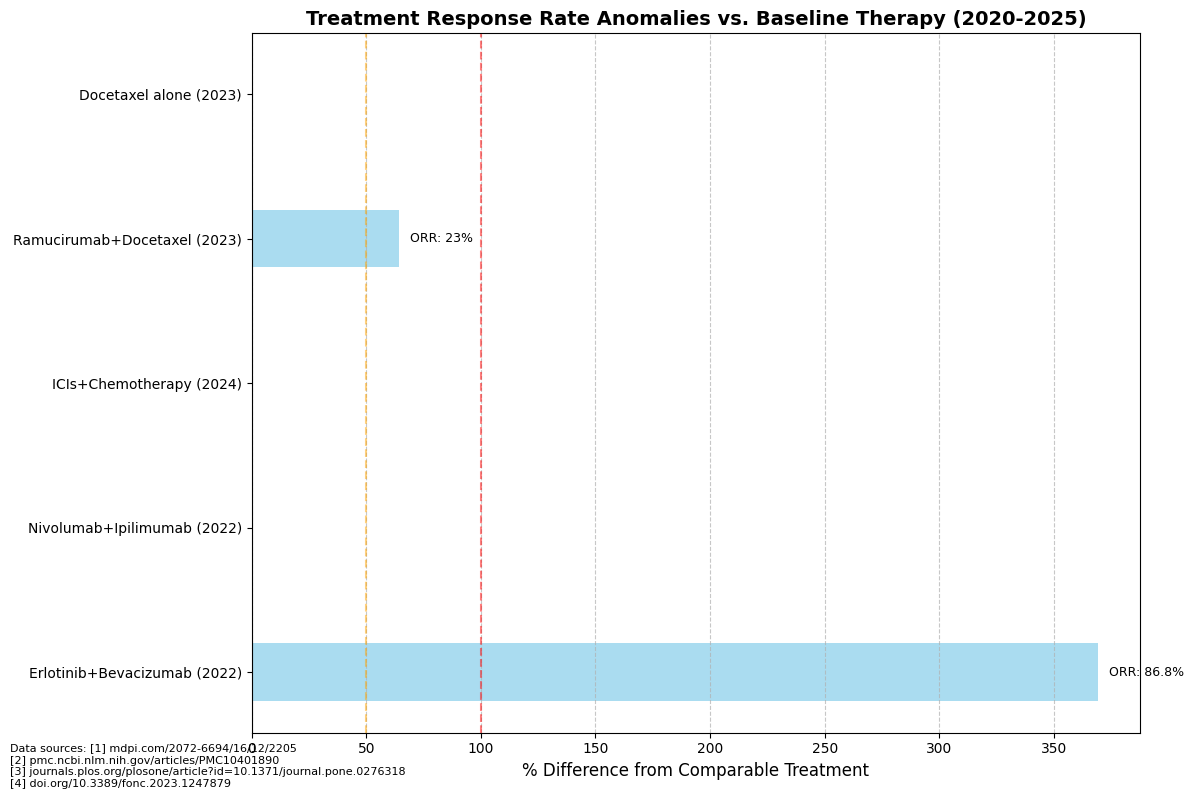

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data from report (2020-2025)
treatments = [
    "Erlotinib+Bevacizumab (2022)",
    "Nivolumab+Ipilimumab (2022)",
    "ICIs+Chemotherapy (2024)",
    "Ramucirumab+Docetaxel (2023)",
    "Docetaxel alone (2023)"
]

# Response rates and baseline for comparison
response_rates = [86.8, None, None, 23, 14]  # ORR (%)
survival_rates = [17.9, 21.2, None, 10.5, 9.1]  # Median OS/PFS (months)

# Calculate anomaly scores (difference from average of treatment pairs)
docetaxel_avg_orr = (23 + 14) / 2
docetaxel_avg_os = (10.5 + 9.1) / 2

# Anomaly scores (% difference from relevant baseline)
orr_anomaly = [
    (86.8 - docetaxel_avg_orr) / docetaxel_avg_orr * 100 if response_rates[0] else 0,
    0,  # No ORR data for Nivo+Ipi
    0,  # No ORR percentage for ICIs+Chemo, only hazard ratio
    (23 - 14) / 14 * 100,  # Compare to docetaxel alone
    0  # Baseline
]

# Create plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot response rate anomalies
bars1 = ax.barh(treatments, orr_anomaly, color='skyblue', alpha=0.7, height=0.4)

# Add value labels
for bar, value, rate in zip(bars1, orr_anomaly, response_rates):
    if value != 0:
        ax.text(bar.get_width() + 5, bar.get_y() + bar.get_height()/2,
                f'ORR: {rate}%', va='center', fontsize=9)

# Customize plot
ax.set_title('Treatment Response Rate Anomalies vs. Baseline Therapy (2020-2025)',
             fontsize=14, fontweight='bold')
ax.set_xlabel('% Difference from Comparable Treatment', fontsize=12)
ax.axvline(x=0, color='gray', linestyle='-', alpha=0.5)

# Highlight anomaly thresholds
ax.axvline(x=50, color='orange', linestyle='--', alpha=0.5)
ax.axvline(x=100, color='red', linestyle='--', alpha=0.5)

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.figtext(0.01, 0.01,
           "Data sources: [1] mdpi.com/2072-6694/16/12/2205\n"
           "[2] pmc.ncbi.nlm.nih.gov/articles/PMC10401890\n"
           "[3] journals.plos.org/plosone/article?id=10.1371/journal.pone.0276318\n"
           "[4] doi.org/10.3389/fonc.2023.1247879", fontsize=8)
plt.show()

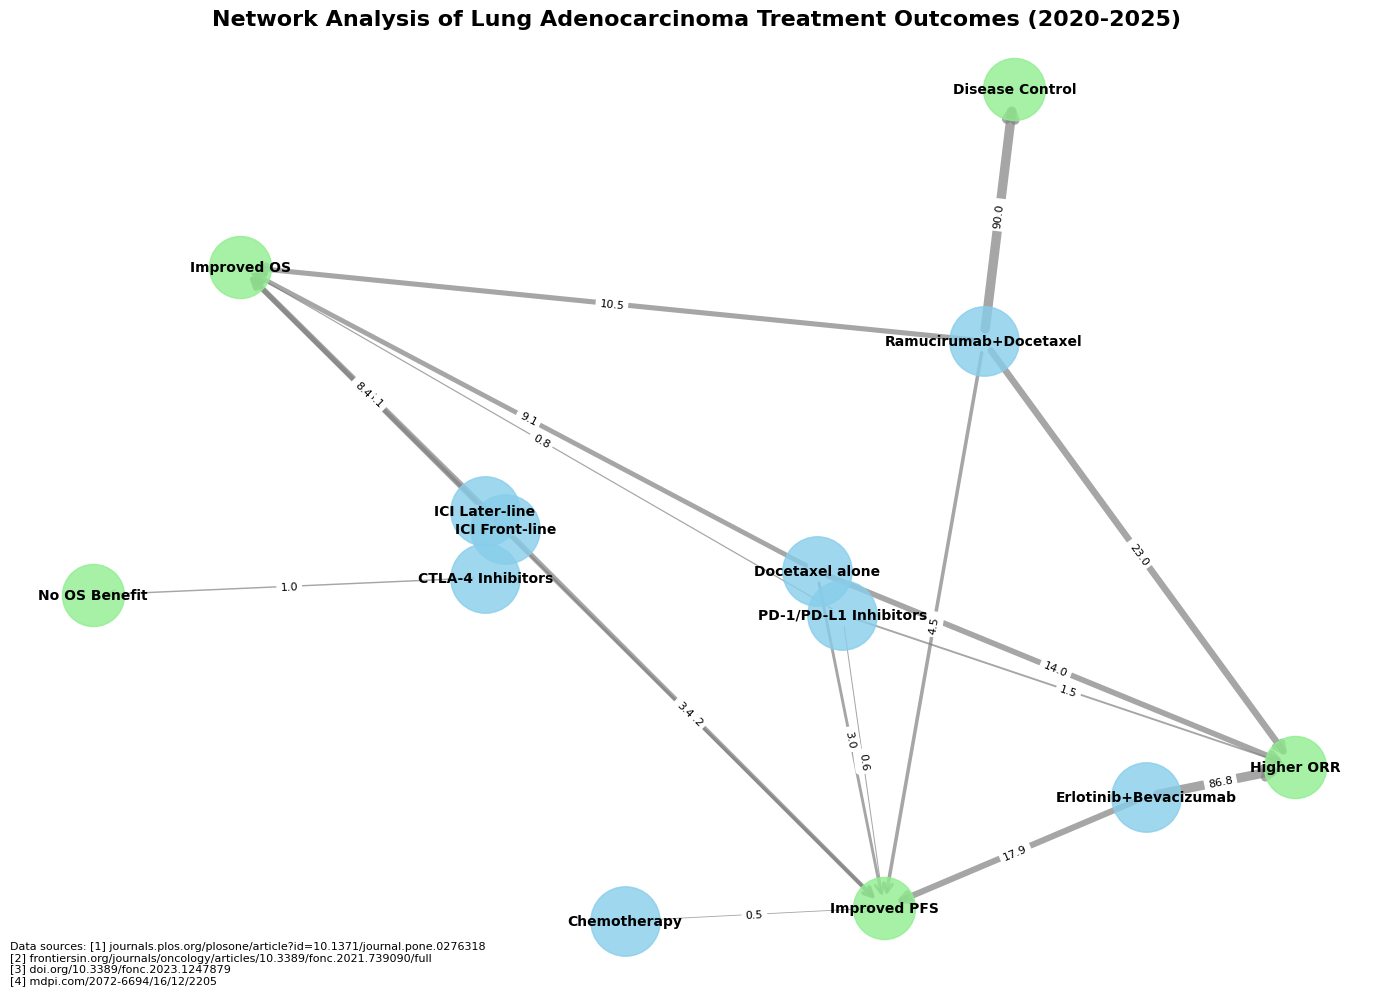

In [3]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Create directed graph
G = nx.DiGraph()

# Add nodes for treatments and outcomes
treatments = [
    "PD-1/PD-L1 Inhibitors",
    "CTLA-4 Inhibitors",
    "Chemotherapy",
    "ICI Front-line",
    "ICI Later-line",
    "Ramucirumab+Docetaxel",
    "Docetaxel alone",
    "Erlotinib+Bevacizumab"
]

outcomes = [
    "Improved OS",
    "Improved PFS",
    "Higher ORR",
    "No OS Benefit",
    "Disease Control"
]

# Add nodes
for t in treatments:
    G.add_node(t, bipartite=0)
for o in outcomes:
    G.add_node(o, bipartite=1)

# Add edges with weights based on quantitative data from report
edges = [
    ("PD-1/PD-L1 Inhibitors", "Improved OS", 0.79),  # HR = 0.79
    ("PD-1/PD-L1 Inhibitors", "Improved PFS", 0.62),  # HR = 0.62
    ("PD-1/PD-L1 Inhibitors", "Higher ORR", 1.48),  # RR = 1.48
    ("CTLA-4 Inhibitors", "No OS Benefit", 1.0),  # "no benefits gained in OS nor ORR"
    ("Chemotherapy", "Improved PFS", 0.5),  # Base comparison
    ("ICI Front-line", "Improved OS", 15.1),  # mOS 15.1 months
    ("ICI Front-line", "Improved PFS", 7.2),  # mPFS 7.2 months
    ("ICI Later-line", "Improved OS", 8.4),  # mOS 8.4 months
    ("ICI Later-line", "Improved PFS", 3.4),  # mPFS 3.4 months
    ("Ramucirumab+Docetaxel", "Improved OS", 10.5),  # mOS 10.5 months
    ("Ramucirumab+Docetaxel", "Improved PFS", 4.5),  # mPFS 4.5 months
    ("Ramucirumab+Docetaxel", "Higher ORR", 23),  # ORR 23%
    ("Ramucirumab+Docetaxel", "Disease Control", 90),  # "disease control rates up to 90%"
    ("Docetaxel alone", "Improved OS", 9.1),  # mOS 9.1 months
    ("Docetaxel alone", "Improved PFS", 3.0),  # mPFS 3.0 months
    ("Docetaxel alone", "Higher ORR", 14),  # ORR 14%
    ("Erlotinib+Bevacizumab", "Higher ORR", 86.8),  # ORR 86.8%
    ("Erlotinib+Bevacizumab", "Improved PFS", 17.9)  # PFS 17.9 months
]

# Add edges to graph
for source, target, weight in edges:
    G.add_edge(source, target, weight=weight)

# Create plot
plt.figure(figsize=(14, 10))

# Define positions
pos = nx.spring_layout(G, k=0.5, seed=42)

# Draw nodes
nx.draw_networkx_nodes(G, pos,
                      nodelist=[n for n, d in G.nodes(data=True) if n in treatments],
                      node_color='skyblue',
                      node_size=2500,
                      alpha=0.8)
nx.draw_networkx_nodes(G, pos,
                      nodelist=[n for n, d in G.nodes(data=True) if n in outcomes],
                      node_color='lightgreen',
                      node_size=2000,
                      alpha=0.8)

# Draw edges with width based on weight
for u, v, d in G.edges(data=True):
    nx.draw_networkx_edges(G, pos, edgelist=[(u, v)],
                          width=np.log1p(d['weight'])*1.5,
                          alpha=0.7,
                          edge_color='gray',
                          arrows=True,
                          arrowstyle='->',
                          arrowsize=15)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

# Draw edge labels
edge_labels = {(u, v): f"{d['weight']:.1f}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title('Network Analysis of Lung Adenocarcinoma Treatment Outcomes (2020-2025)',
         fontsize=16, fontweight='bold')
plt.axis('off')
plt.tight_layout()

plt.figtext(0.01, 0.01,
           "Data sources: [1] journals.plos.org/plosone/article?id=10.1371/journal.pone.0276318\n"
           "[2] frontiersin.org/journals/oncology/articles/10.3389/fonc.2021.739090/full\n"
           "[3] doi.org/10.3389/fonc.2023.1247879\n"
           "[4] mdpi.com/2072-6694/16/12/2205", fontsize=8)
plt.show()